In [7]:
import scipy.signal as signal
from pylab import *
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller


In [1]:
def extract_currency(x):
    if isinstance(x, str):
        return(x.replace('%', '').replace(',', ''))
    return(x)


In [11]:

#funcion que que permite crear y graficar la respuesta en frecuencia de un filtro     
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    h_pot = abs(h)
    
    plt.figure(figsize=(18,8))
    subplot(311)
    plot(w/max(w),h_dB)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')


    subplot(312)
    plot(w/max(w),h_pot)
    ylabel('Magnitude (W)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')

    subplot(313)
    
    h_Phase =  np.angle(h)  #unwrap(arctan2(imag(h),real(h)))
   
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    #xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    subplots_adjust(hspace=0.5)
    show()


def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    
    plt.figure(figsize=(12,5))
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    subplots_adjust(hspace=0.5)
    show()
def zeropoles(b, a=1):
    w,h = signal.freqz(b,a)
    sys1=signal.lti(b, a)
    #subplot(121)
    #plot(h.real, h.imag)
    #plot(h.real, -h.imag)
    #subplot(122)
    ang=np.arange(0.0,2*np.pi,0.01)
    xp=np.cos(ang)
    yp=np.sin(ang)
    plot(xp,yp,'--')
    plot(sys1.zeros.real, sys1.zeros.imag, 'o')
    plot(sys1.poles.real, sys1.poles.imag, 'x')
    #xlim(np.min(sys1.zeros.imag)-1, np.max(sys1.zeros.imag)+1)
    #ylim(np.min(sys1.zeros.imag)-1, np.max(sys1.zeros.imag)+1)
    show()

<h1>1. INTRODUCCIÓN</h1>
<p>En este laboratorio se pretende afianzar los conceptos relacionados con el an´alisis de las series de tiempo,
filtro de media móvil y filtro de primera diferencia.
</p>


<h2>2. Análisis de series de tiempo</h2>

<h3>2.1 Procedimiento</h3>

<p>
1. La se˜nal corresponde a datos del la tasa de cambio representativa del mercado (TRM), la cual mide
la cantidad de pesos colombianos por un d´olar de los Estados Unidos. El archivo historical TRM.csv
contiene 6 columnas con la siguiente informaci´on:

<li>Fecha</li>
<li>Precio</li>
<li>Apertura</li>
<li>Máximo</li>
<li>Mínimo</li>
<li>Cambio</li>
</p>

In [41]:
datos = pd.read_csv('historical_TRM.csv', delimiter=',') # Lectura archivo.
price  =  np.array(datos['Precio'].apply(extract_currency).astype('float'))[::-1]  
tiempo =  np.array(datos['Fecha'])[::-1]
cambio =  np.array(datos['Cambio'].apply(extract_currency).astype('float'))[::-1]

In [42]:
datos['Fecha']=pd.to_datetime(datos['Fecha'])
datos=datos.sort_values(by ='Fecha', ascending=True)
diferente_tiempo=datos['Fecha'].diff().dropna()
promedio_fecha=diferente_tiempo.mean()
#Ahora en dias, mes y años se tiene
print(f"El período de muestreo promedio es de {promedio_fecha.days} días, o {promedio_fecha.days/7:.2f} semanas, o {promedio_fecha.days/365.25:.2f} años.")



El período de muestreo promedio es de 7 días, o 1.00 semanas, o 0.02 años.


<p>Grafique la se˜nal Precio en funci´on del tiempo y presente un an´alisis sobre la misma.</p>

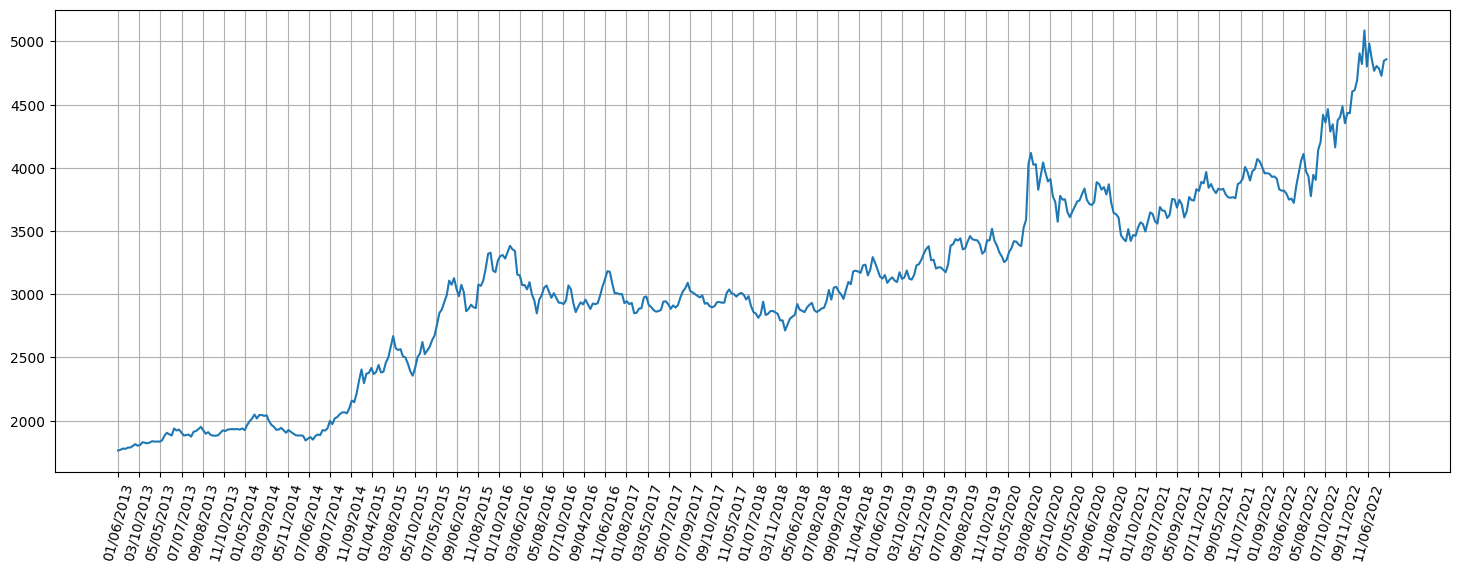

In [35]:
plt.figure(figsize=(18,6))
plt.plot( tiempo,  price)
plt.tick_params(axis='x' , rotation=75)
plt.xticks(list(np.arange(0,len(tiempo),len(tiempo)/60))) 
plt.grid()
plt.show()

<p>Según lo que se puede apreciar en la grafica, nos muestra el comportamiento de la moneda colombiana al cambio con el dolar, entonces se puede ver que a medida  que va 
pasando el tiempo, vemos una tendencia al alza de la divisa con el paso del tiempo.</p>

<p> 4. Grafique la se˜nal Cambio en funci´on del tiempo y presente un an´alisis sobre la misma.
</p>

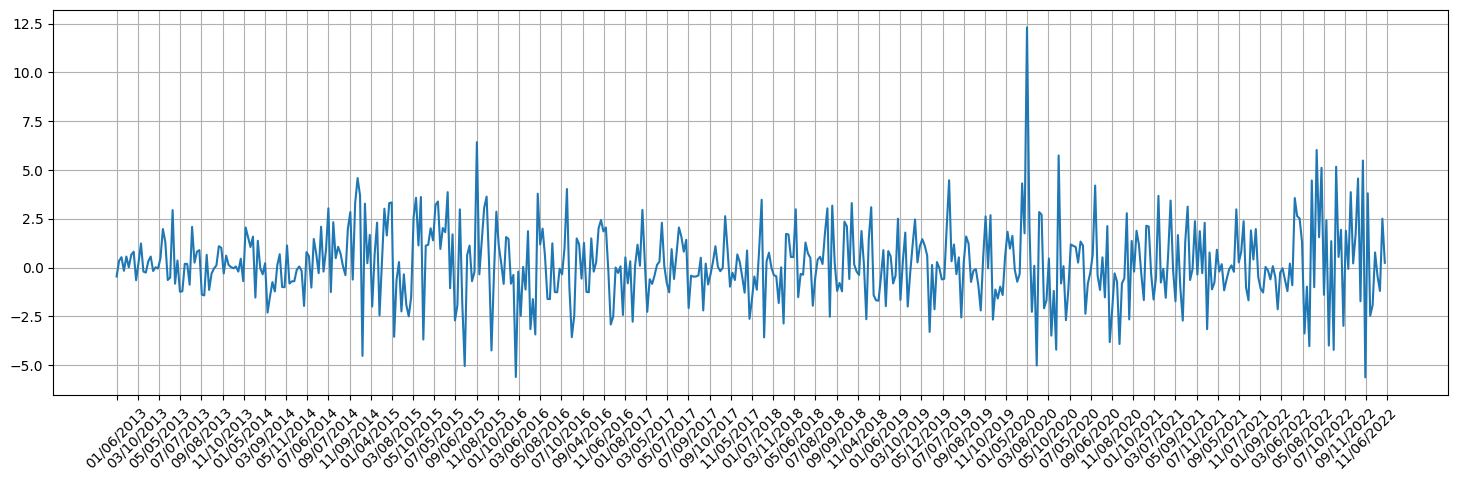

In [43]:
plt.figure(figsize=(18,5))
plt.plot( tiempo,  cambio)
plt.tick_params(axis='x' , rotation=45)
plt.xticks(list(np.arange(0,len(tiempo),len(tiempo)/60)))  
plt.grid()
plt.show()

<p>
En lo que respecta al gráfico de cambio, da una razón a entender que tan estable se encuentra la divisa en periodos de tiempo, por ejemplo. se puede ver unos picos considerablemenbte mayores en algunos instantes de tiempo, esto significa que el algún momento la divisa se disparó o al contrario decayó abruptamente
</p>

<p>
Calcule la autocorrelaci´on de la se˜nal Precio y la correlacion con la se˜nal Cambio. ¿Que puede concluir
del resultado?

</p>

<li>Autocorrelación del precio</li>

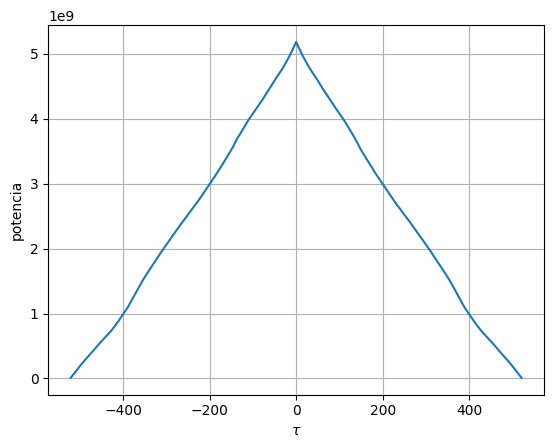

In [45]:
Rxx=np.correlate(price, price, mode='full')
tau=np.arange(-len(price)+1,len(price),1) # vector de retraso
plt.plot(tau,Rxx)
plt.xlabel(r'$\tau$')
plt.ylabel('potencia')
plt.grid()
plt.show()

<li>Correlación con señal de cambio</li>

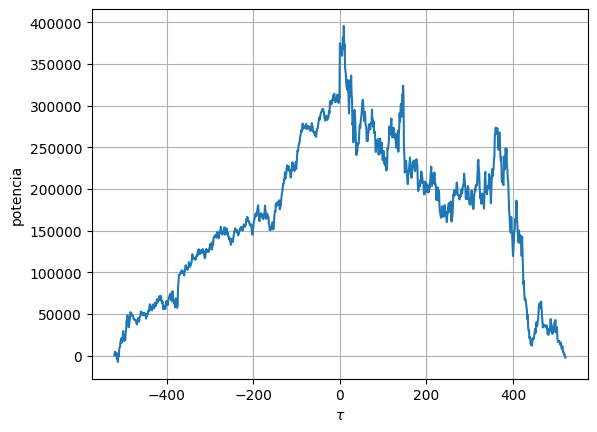

In [46]:
Rxy=np.correlate(price, cambio, mode='full')
plt.plot(tau,Rxy)
plt.xlabel(r'$\tau$')
plt.ylabel('potencia')
plt.grid()
plt.show()

<p>
<li>En lo que respecta a las graficas, tenemos una relación lineal entre los patrones de cambio y de precio, por ejemplo, vemos que en el punto cero de las graficas se tiene una relación completa entre lo que le pasa a la moneda y su tasa de cambio.
</li>
<li>
Puede verse como un comportamiento que tiene que ver con lo que pasa actualmente, en el pasado y una predicción del comportamiento a futuro de las divisas. Otro ejemplo de ello puede ser por ejemplo el comportamiento del clima durante una semana, etc.
</li>
</p>

In [48]:

# Cargar tus datos en dos DataFrames (por ejemplo, df1 y df2)
# Asegúrate de que tus datos sean series temporales en formato DataFrame con una columna de fechas o índices de tiempo.

# Realizar el test de Dickey-Fuller para la primera señal (df1)
result1 = adfuller(price)

# Imprimir el resultado
print("Resultado para el precio:")
print("Estadística de prueba:", result1[0])
print("Valor p:", result1[1])
print("Valores críticos:", result1[4])

# Realizar el test de Dickey-Fuller para la segunda señal (df2)
result2 = adfuller(cambio)

# Imprimir el resultado
print("\nResultado para el cambio:")
print("Estadística de prueba:", result2[0])
print("Valor p:", result2[1])
print("Valores críticos:", result2[4])

Resultado para el precio:
Estadística de prueba: 0.3031204192267247
Valor p: 0.9774871972556076
Valores críticos: {'1%': -3.4433139398425348, '5%': -2.867257567756961, '10%': -2.5698152474041915}

Resultado para el cambio:
Estadística de prueba: -13.470518522141994
Valor p: 3.3895828673747505e-25
Valores críticos: {'1%': -3.4430126933746767, '5%': -2.8671249839002764, '10%': -2.569744590233924}


<p>
Con el test de Fuller, por ejemplo para la señal de <strong>precio</strong> nos dice que se trata de una señal no estacionaria, la cual va a mostrar cambios en sus propiedades estadisticas a lo largo del tiempo. Esto se puede manifestar en tendencias,patrones estaciones o ciclos que hacen que la serie tengan una media o varianza que varian con el tiempo. 
Por otro lado, la señal de <strong>cambio</strong>es estacionaria según su p-value, lo cual puede indicar que la señal no va a tener cambios en su media y varianza de forma significativa a medida que pasa el tiempo. 
</p>

<h2>3.  Filtro de media movil
</h2>

<p></>

<h3>3.1 Procedimiento</h3>

<p>1.Dise ̃ne un filtro de media m ́ovil con 3 diferentes valores de L en el rango de 5 a 70, calcule la respuesta
de la se ̃nal Cambio (obtenida en el punto 2.1.6) ante dicho filtro y grafique la se ̃nal resultante usando
subplots (se puede utilizar el vector de tiempos generado anteriormente). ¿Con cual considera que se
visualiza y se podr ́ıa analizar mejor la informaci ́on?</p>

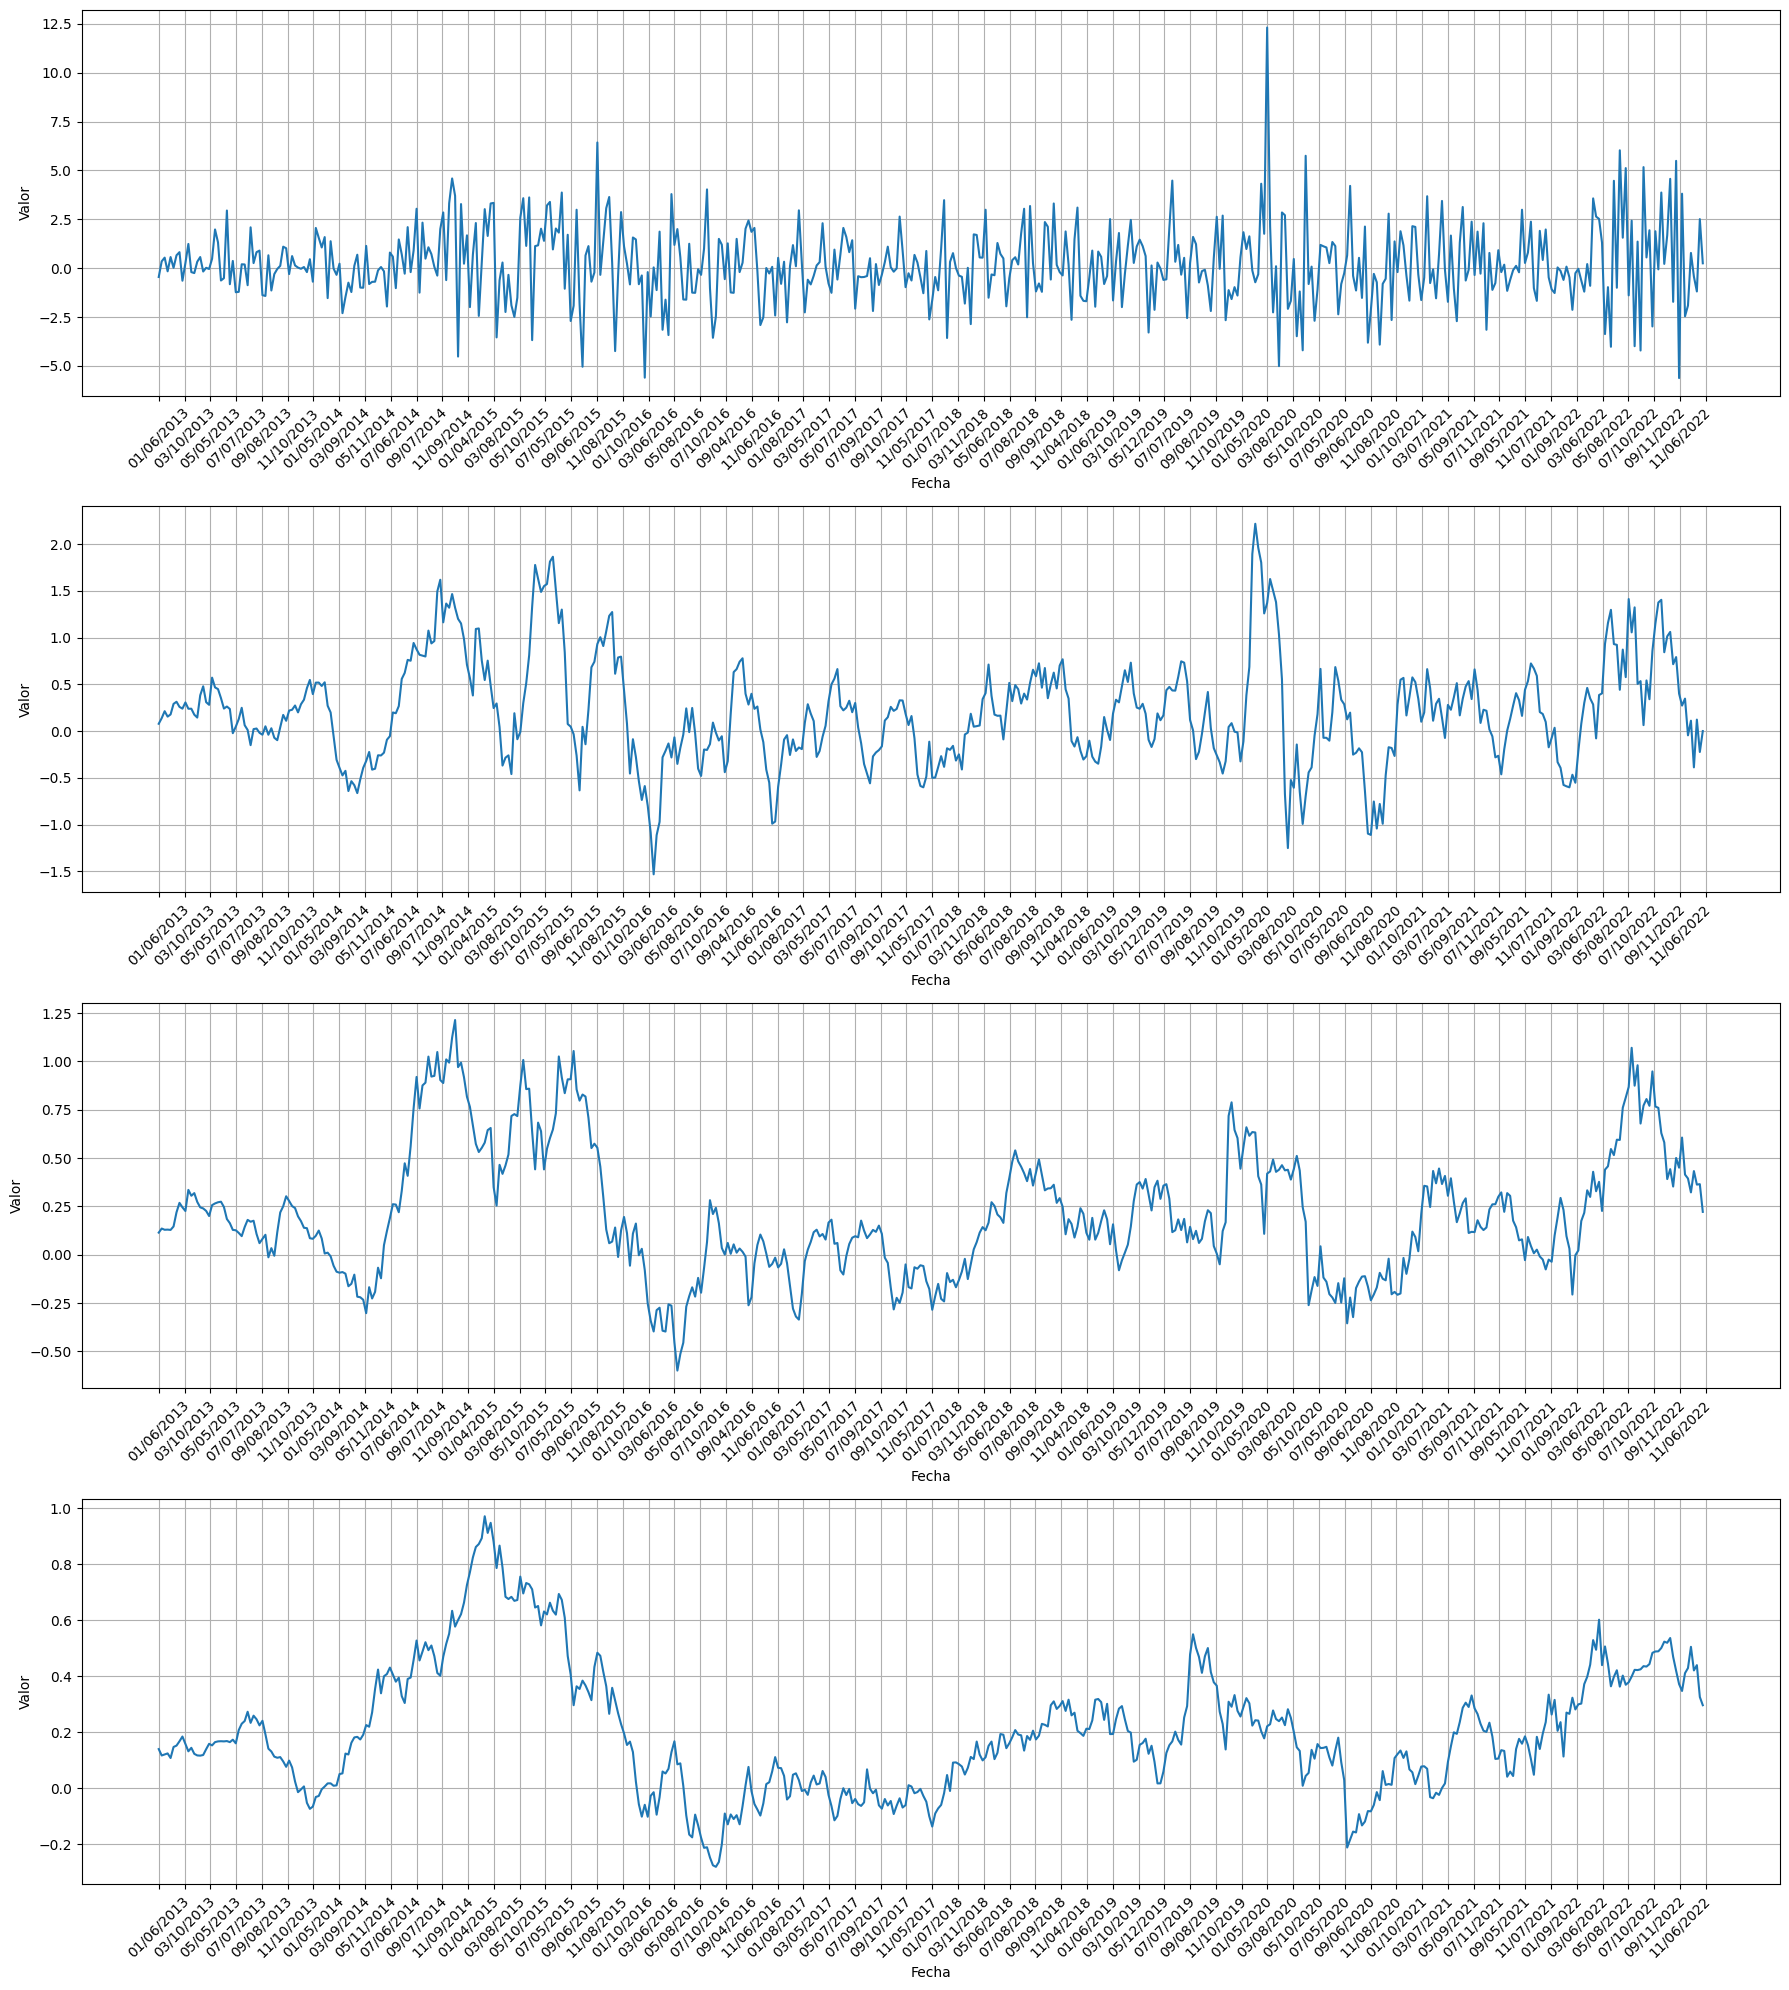

In [58]:
L=[11,27,53]
# GRAFICO DE LA SEÑAL ORIGINAL
plt.figure(figsize=(18,20))
plt.subplot(4,1, 1 )
plt.plot(tiempo, cambio)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.tick_params(axis='x' , rotation=45)
plt.xticks(list(np.arange(0,len(tiempo),len(tiempo)/60)))
plt.grid()


for i in range(0,3):
    l =  L[i]
    coefs  = np.ones(l)/float(l) #Coeficientes (cantidad de puntos usados en el filtro de media movil)
    convolsenal =  np.convolve(cambio , coefs ,  mode ='same') # Se hace la convolución
    # Grafico cada señal
    plt.subplot(4,1, i+2)
    plt.plot(tiempo, convolsenal)
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.tick_params(axis='x' , rotation=45)
    plt.xticks(list(np.arange(0,len(tiempo),len(tiempo)/60)))
    plt.grid()
    
plt.tight_layout()
plt.show()

<p>
En el contexto que se se está ussando un filtro, se le debe pasar el parametro "same" a la convulución para que la salida tenga el mismo tamaño que la salida ( esto normalmente si se tiene un filtro de tamaño impar).
Según lo que se ve en la gráfica, es posible determinar una mayor fidelidad en la información con un <strong>L</strong> más pequeño, por que a medida que el valor es mayor la señal se va a filtrar más y se puede llegar a perder información valiosa, como es el caso en los picos de mayor tasa de cambio. 
</p>

<p>Se usa la función ztrans como función en el ynb</p>
<p>3.Uso de la función impz y comparación con L=6 y L=25

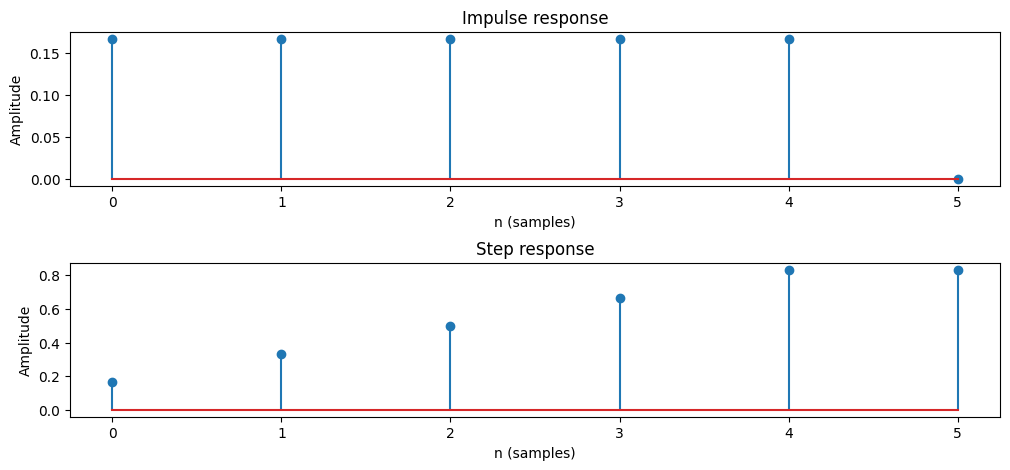

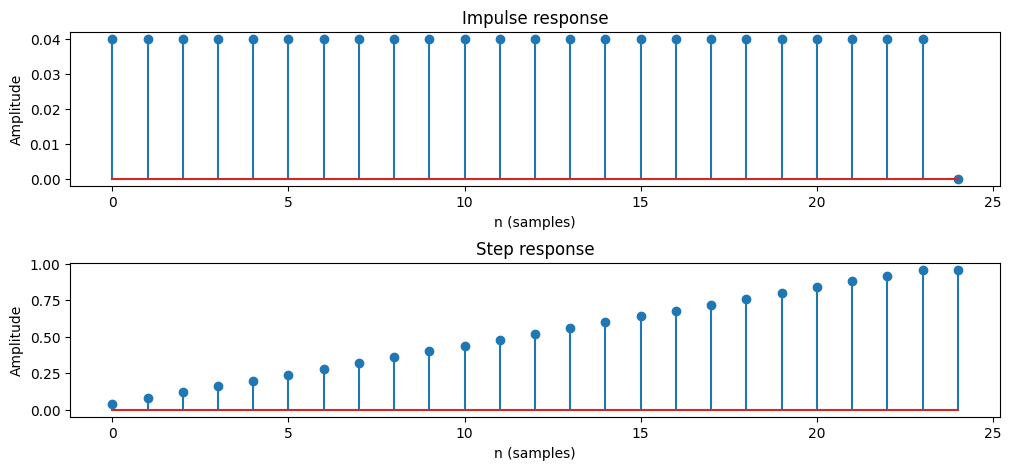

In [59]:
puntos = [6,25]
for L in puntos:
    num=np.zeros(L)
    num[0]=1.0/L
    num[-1]=-1.0/L
    den=np.zeros(L)
    den[0]=1    
    den[1]=-1
    impz(num,den)

<p>Entre la respuesta al escalon y al impulso, lo primero que se puede decir, es que el impulso dará como se comportará el sistema ante una excitación, por otro lado, se puede ver como el promedio entre las muestras en el impulso dando una forma rectangular, por otro lado con el impulso, se tiene el mismo promedio para las muestras, bien sea 1/L, sin embargo los valores son acumulativos y se van promediando así a medida que van aumentando las muestras que van pasando por el filtro </p>

c:\Users\Asus\OneDrive - Universidad de Antioquia\Documentos\proyect\workspace\PDS_lab\PDS\PDS\lib\site-packages\scipy\signal\_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


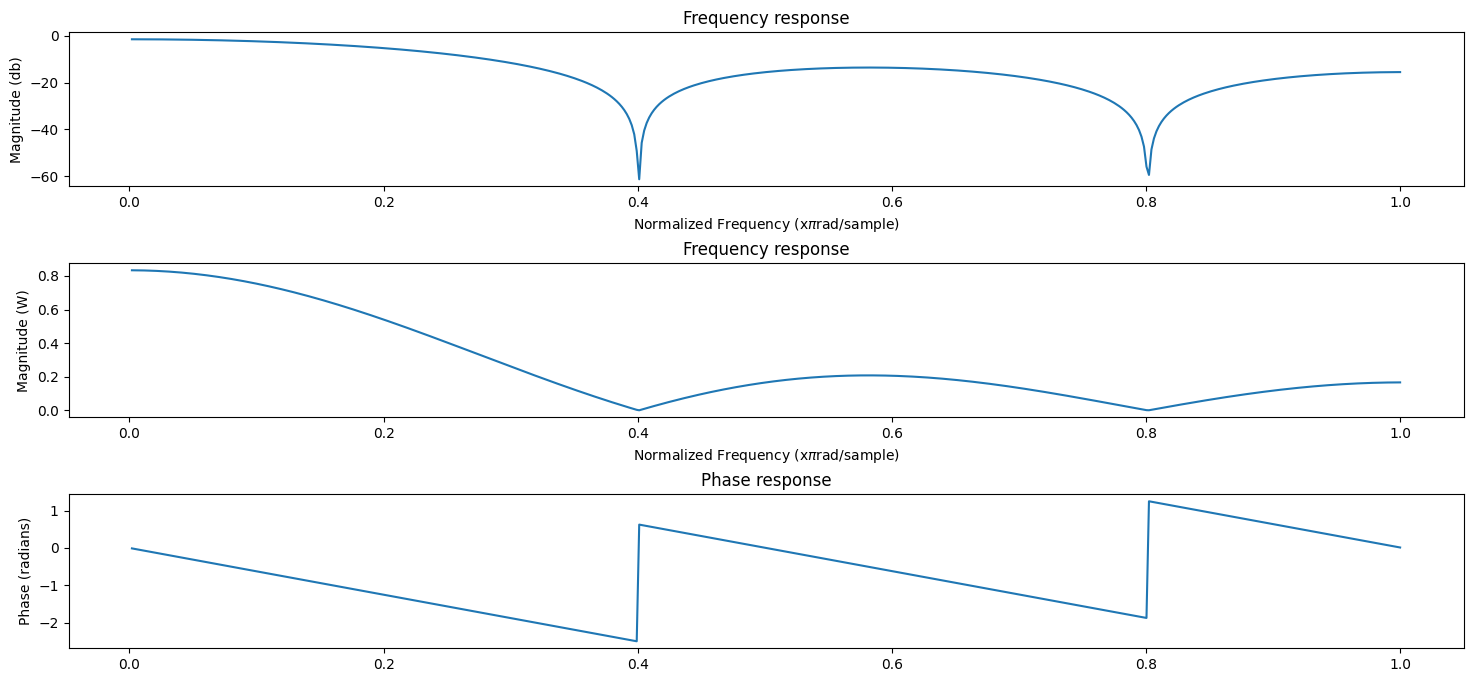

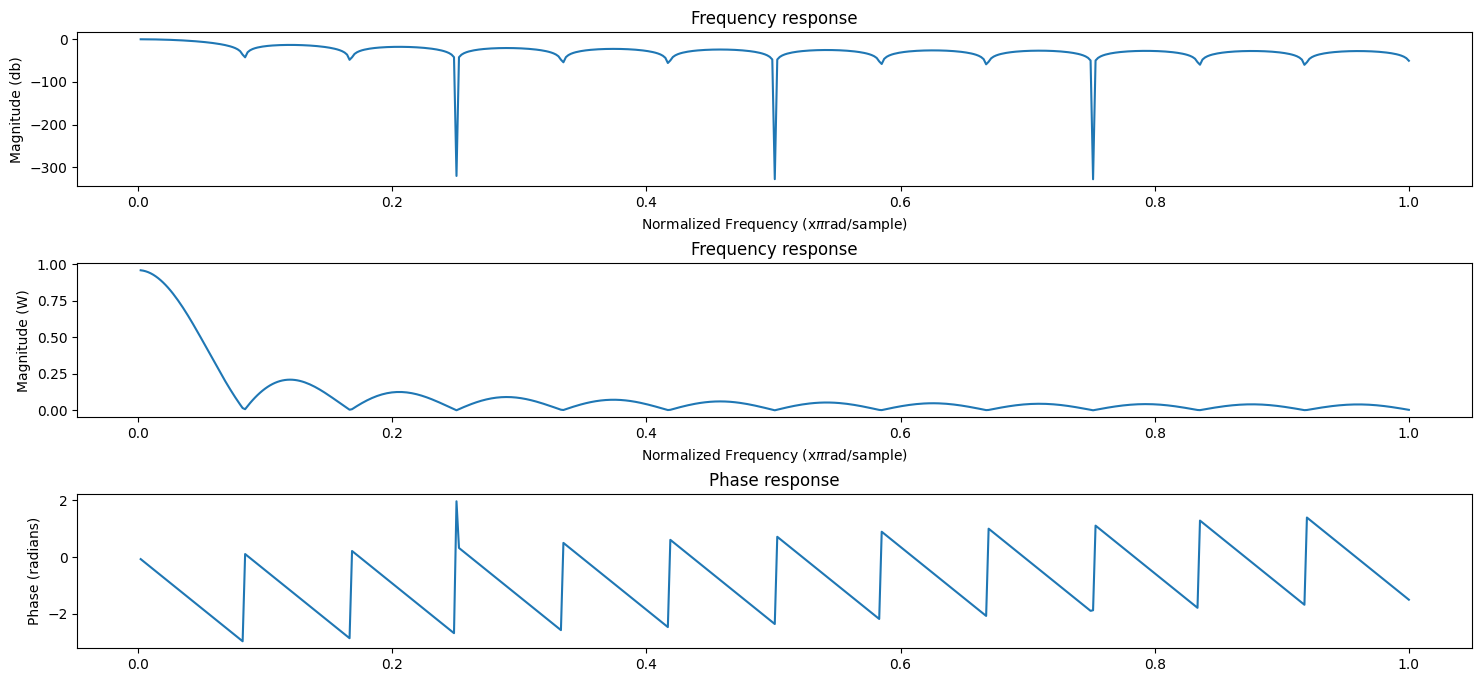

In [60]:
puntos = [6,25]
for L in puntos:
    num=np.zeros(L)
    num[0]=1.0/L
    num[-1]=-1.0/L
    den=np.zeros(L)
    den[0]=1    
    den[1]=-1
    mfreqz(num,den)

<p>Los graficos denotan el comportamientos de filtros pasabajas, en donde a menor puntos del filtro, mayores frecuencias se van a dejar pasar y a mayor cantidad de puntos del filtro, menos frecuencias se van a dejar pasar. </p>

<h2>4. Filtro de primera diferencia<h2>


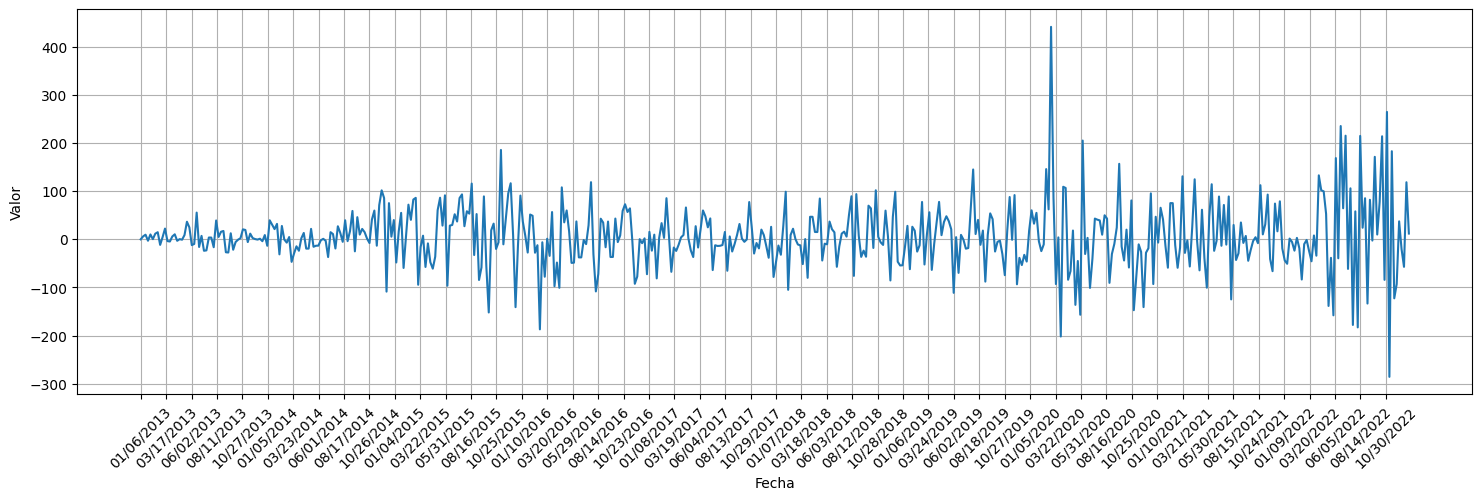

In [67]:
difcoefs=[1, -1]
convolsenal =  np.convolve(price , difcoefs ,  mode ='same') # Se hace la convolución
plt.figure(figsize=(18,5))
convolsenal[0]= 0.0 #Para evitar el pico en la convolución con el dato anterior que no existe. 
plt.plot(tiempo, convolsenal)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.tick_params(axis='x' , rotation=45)
plt.xticks(list(np.arange(0,len(tiempo),len(tiempo)/50)))
plt.grid()

plt.show()

<p>Cuando se realiza la derivada de la señal de precio, se obtiene el cambio de los datos obtenidos.Lo cual corresponde a la información que ya se tenía</p>

<p>Uso de funcion impz</|p>

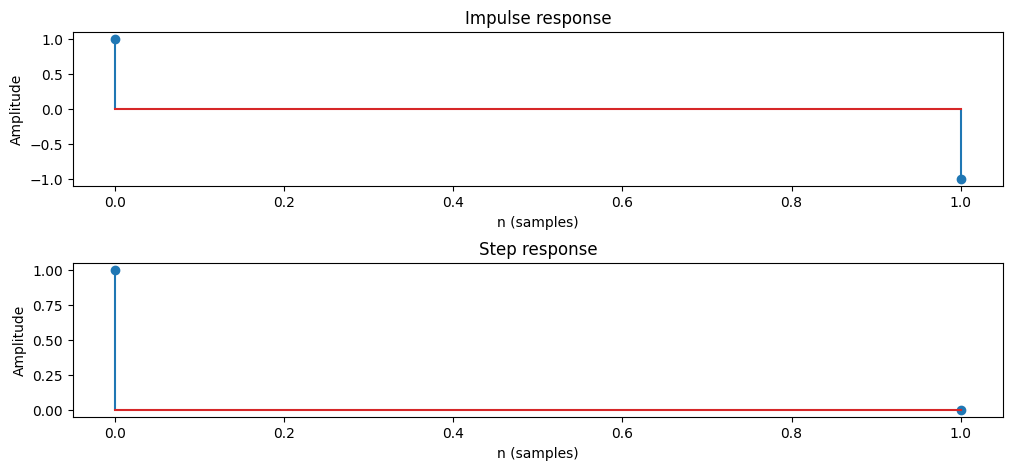

In [64]:
num=[1,-1]
den=[1,0]
impz(num,den)

<p>uso función mfreqs </p>

C:\Users\Asus\AppData\Local\Temp\ipykernel_21864\1139170801.py:4: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * log10 (abs(h))


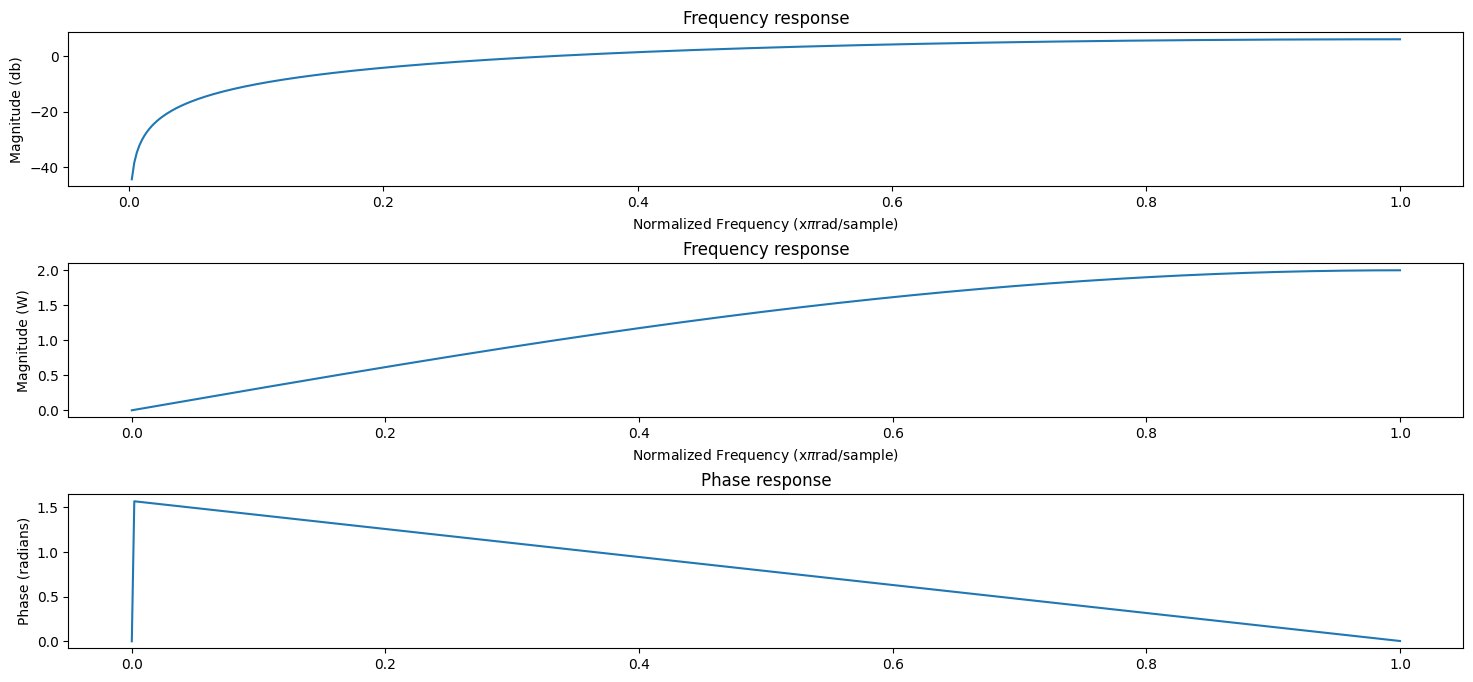

In [65]:
mfreqz(num,den)

<p>
al tratarse de la diferencia, se obtiene un filtro pasaaltas, en donde se tiene que para el filtro lo que se va a atenuar son las bajas frecuencias y va a dejar pasar las de alta frecuencia
</p>

<h2>CONCLUSIONES GENERALES</h2>

<li>Cuando se tienen filtros, se espera según el comportamiento de sus diagramas de bode que se brinde información de la clase de frecuencias que se va a pasar, bien sea pasa altas o pasa bajas</li>
<li>cuando se analiza los datos mediante las primeras diferencias, según sea el dato de analisis pueede dar información acerca de lo que se espera.</li>
<li>Cómo se puede relacionar la información de algunos valores, teniendo en cuenta algunos procedimientos estadisticos como el fuller, en donde nos puede dar información de como va a estar condicionado el cambio de sus variables estadisticas, los cuales dar una predicción del comportamiento a futuro.</li>
